# MDFP intro figure
First the MDFP figure; get property fluctuation over time, and then as histogram.


In [1]:
import mdtraj as md
import sys
sys.path.append('..')
from Extractor import LiquidExtractor
from Parameteriser import LiquidParameteriser
import matplotlib.pyplot as plt

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



2024-09-09 14:44:10,653 - INFO - Running parameterisation for SMILES: c1ccccc1 with density: 0.95 g/mL and 100 molecules.
2024-09-09 14:44:10,654 - INFO - Creating substance and workflow schema.
2024-09-09 14:44:10,666 - INFO - Executing workflow.
2024-09-09 14:44:10,771 - INFO - Executing 50ce1dbea7124c9ea9d0ede8acebe577|build_coordinates
2024-09-09 14:44:11,066 - INFO - 50ce1dbea7124c9ea9d0ede8acebe577|build_coordinates finished executing after 294.44729490205646 ms
2024-09-09 14:44:11,071 - INFO - Executing 50ce1dbea7124c9ea9d0ede8acebe577|assign_parameters
2024-09-09 14:44:11,314 - INFO - Attempting to up-convert vdW section from 0.3 to 0.4
2024-09-09 14:44:11,315 - INFO - Successfully up-converted vdW section from 0.3 to 0.4. `method="cutoff"` is now split into `periodic_method="cutoff"` and `nonperiodic_method="no-cutoff"`.
2024-09-09 14:44:11,323 - INFO - Attempting to up-convert Electrostatics section from 0.3 to 0.4
2024-09-09 14:44:11,324 - INFO - Successfully up-converted El

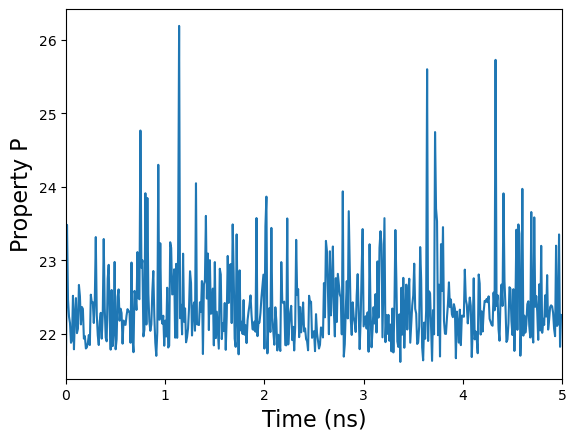

Text(46.972222222222214, 0.5, 'Frequency')

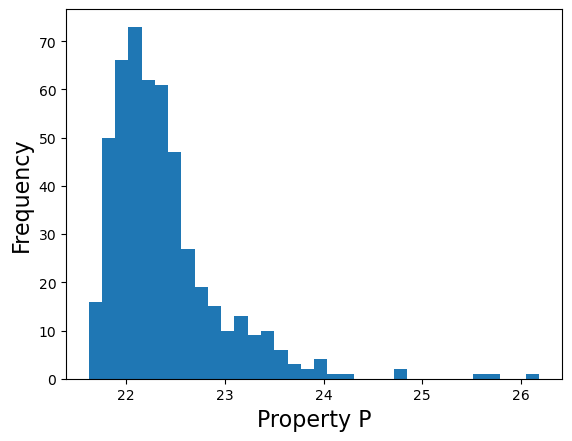

In [2]:
smiles = 'c1ccccc1'
rdk_pmd = LiquidParameteriser.via_rdkit(smiles = smiles, n_mols=100)
traj_path = "/localhome/cschiebroek/MDFP_VP/mdfptools/carl/liquid_phase_experiments/liquid_phase_experiment_daata/test_benzene_full_equil_n100_5ns.h5"
traj = md.load(traj_path)
energies = LiquidExtractor.extract_energies(traj, rdk_pmd)
plt.plot(energies['liquid_intra_lj'])
#change the x-axis to be in ns; divide numbers by 100
plt.xticks(ticks = plt.xticks()[0], labels = [str(int(float(label)/100)) for label in plt.xticks()[0]])
plt.xlabel('Time (ns)', fontsize = 16)
plt.ylabel('Property P', fontsize = 16)
plt.xlim(0, 500)
#save with dpi 800
plt.savefig('intra_molecular_energy.png', dpi = 800)
plt.show()
#and as histogram   
plt.hist(energies['liquid_intra_lj'], bins = 'auto')
plt.xlabel('Property P', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.savefig('intra_molecular_energy_hist.png', dpi = 800)
plt.ylabel('Frequency')

# Clausius-Clapeyron figures

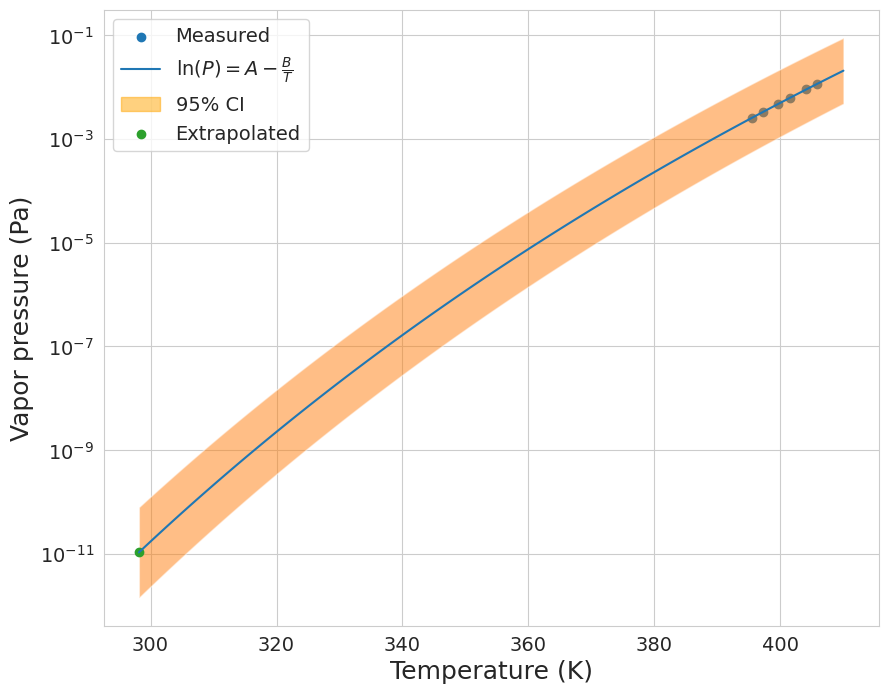

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
measured_vps = [0.00260,0.00337,0.00471 ,0.00606,0.00912 ,0.0116]
measured_temps = [395.55,397.29 ,399.67 ,401.47 ,404.12 ,405.78]

def Get_VP_from_Clausius_Clapeyron(A,B,T_K,B_std = None):
    '''
    A and B are constants, T is temperature in Kelvin
    '''
    ln_P_pa = A - B/T_K
    P_pa = np.exp(ln_P_pa)
    if B_std:
        #calc upper and lower
        ln_P_pa_upper = A - (B+B_std)/T_K
        P_pa_upper = np.exp(ln_P_pa_upper)
        ln_P_pa_lower = A - (B-B_std)/T_K
        P_pa_lower = np.exp(ln_P_pa_lower)
        return P_pa,P_pa_upper,P_pa_lower
    
    return P_pa

A_d_glucose = 53.16
B_d_glucose_mean = 23383
B_d_glucose_std = 600
T_K = 298.15
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(measured_temps,measured_vps,label='Measured')
T_K = np.linspace(298.15,410,100)
vps = [Get_VP_from_Clausius_Clapeyron(A_d_glucose,B_d_glucose_mean,T,B_std = B_d_glucose_std) for T in T_K]
vp_means = [vp[0] for vp in vps] 
vp_upper = [vp[1] for vp in vps]
vp_lower = [vp[2] for vp in vps]
ax.plot(T_K,vp_means,label=r'$\ln(P) = A - \frac{B}{T}$')
ax.fill_between(T_K,vp_lower,vp_upper,alpha=0.5)
ax.set_xlabel('Temperature (K)',fontsize=18)
ax.set_ylabel('Vapor pressure (Pa)',fontsize=18)
ax.fill_between([],[],[],color='orange',alpha=0.5,label='95% CI')
ax.scatter(298.15,Get_VP_from_Clausius_Clapeyron(A_d_glucose,B_d_glucose_mean,298.15,B_std = B_d_glucose_std)[0],label='Extrapolated')
ax.legend(fontsize=14)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('VP_extrapolation.png', dpi=800)
plt.show()


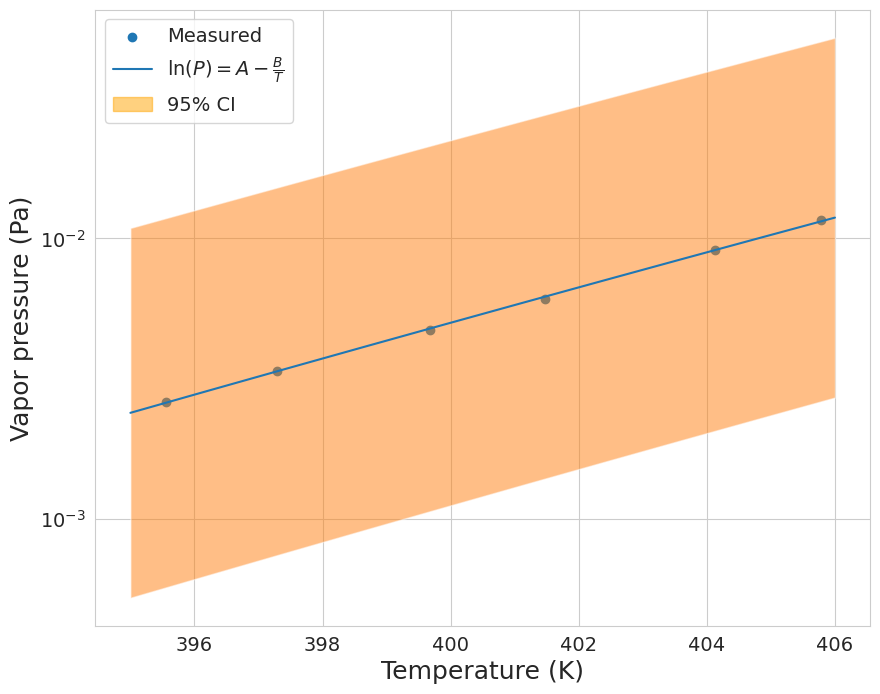

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
measured_vps = [0.00260,0.00337,0.00471 ,0.00606,0.00912 ,0.0116]
measured_temps = [395.55,397.29 ,399.67 ,401.47 ,404.12 ,405.78]

def Get_VP_from_Clausius_Clapeyron(A,B,T_K,B_std = None):
    '''
    A and B are constants, T is temperature in Kelvin
    '''
    ln_P_pa = A - B/T_K
    P_pa = np.exp(ln_P_pa)
    if B_std:
        #calc upper and lower
        ln_P_pa_upper = A - (B+B_std)/T_K
        P_pa_upper = np.exp(ln_P_pa_upper)
        ln_P_pa_lower = A - (B-B_std)/T_K
        P_pa_lower = np.exp(ln_P_pa_lower)
        return P_pa,P_pa_upper,P_pa_lower
    
    return P_pa

A_d_glucose = 53.16
B_d_glucose_mean = 23383
B_d_glucose_std = 600
T_K = 298.15
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(measured_temps,measured_vps,label='Measured')
T_K = np.linspace(395,406,10)
vps = [Get_VP_from_Clausius_Clapeyron(A_d_glucose,B_d_glucose_mean,T,B_std = B_d_glucose_std) for T in T_K]
vp_means = [vp[0] for vp in vps] 
vp_upper = [vp[1] for vp in vps]
vp_lower = [vp[2] for vp in vps]
ax.plot(T_K,vp_means,label=r'$\ln(P) = A - \frac{B}{T}$')
ax.fill_between(T_K,vp_lower,vp_upper,alpha=0.5)
ax.set_xlabel('Temperature (K)',fontsize=18)
ax.set_ylabel('Vapor pressure (Pa)',fontsize=18)
ax.fill_between([],[],[],color='orange',alpha=0.5,label='95% CI')
# ax.scatter(298.15,Get_VP_from_Clausius_Clapeyron(A_d_glucose,B_d_glucose_mean,298.15,B_std = B_d_glucose_std)[0],label='Extrapolated')
ax.legend(fontsize=14,loc='upper left')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('VP_measurements.png', dpi=800)
plt.show()


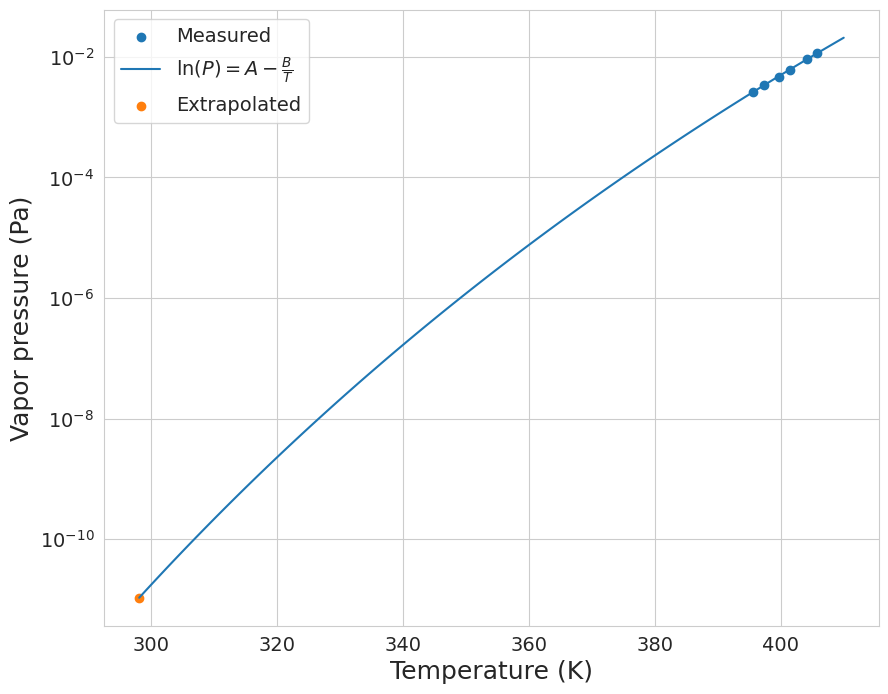

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
measured_vps = [0.00260,0.00337,0.00471 ,0.00606,0.00912 ,0.0116]
measured_temps = [395.55,397.29 ,399.67 ,401.47 ,404.12 ,405.78]

def Get_VP_from_Clausius_Clapeyron(A,B,T_K,B_std = None):
    '''
    A and B are constants, T is temperature in Kelvin
    '''
    ln_P_pa = A - B/T_K
    P_pa = np.exp(ln_P_pa)
    if B_std:
        #calc upper and lower
        ln_P_pa_upper = A - (B+B_std)/T_K
        P_pa_upper = np.exp(ln_P_pa_upper)
        ln_P_pa_lower = A - (B-B_std)/T_K
        P_pa_lower = np.exp(ln_P_pa_lower)
        return P_pa,P_pa_upper,P_pa_lower
    
    return P_pa

A_d_glucose = 53.16
B_d_glucose_mean = 23383
B_d_glucose_std = 600
T_K = 298.15
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(measured_temps,measured_vps,label='Measured')
T_K = np.linspace(298.15,410,100)
vps = [Get_VP_from_Clausius_Clapeyron(A_d_glucose,B_d_glucose_mean,T,B_std = B_d_glucose_std) for T in T_K]
vp_means = [vp[0] for vp in vps] 
vp_upper = [vp[1] for vp in vps]
vp_lower = [vp[2] for vp in vps]
ax.plot(T_K,vp_means,label=r'$\ln(P) = A - \frac{B}{T}$')
# ax.fill_between(T_K,vp_lower,vp_upper,alpha=0.5)
ax.set_xlabel('Temperature (K)',fontsize=18)
ax.set_ylabel('Vapor pressure (Pa)',fontsize=18)
# ax.fill_between([],[],[],color='orange',alpha=0.5,label='95% CI')
ax.scatter(298.15,Get_VP_from_Clausius_Clapeyron(A_d_glucose,B_d_glucose_mean,298.15,B_std = B_d_glucose_std)[0],label='Extrapolated')
ax.legend(fontsize=14)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=14)
# plt.savefig('VP_extrapolation_no_CI.png', dpi=800)
plt.show()


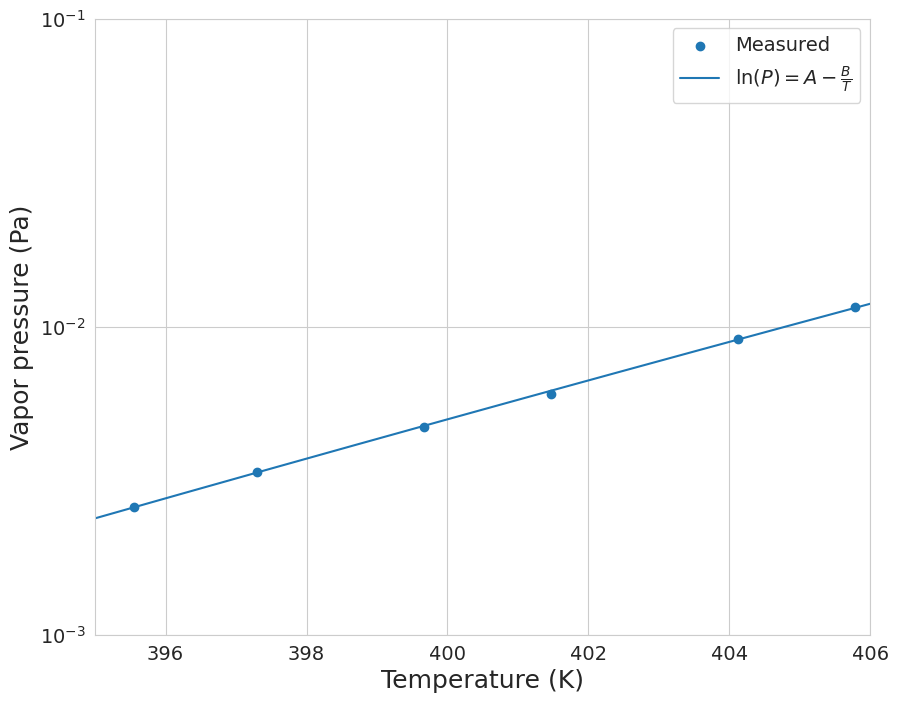

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
measured_vps = [0.00260,0.00337,0.00471 ,0.00606,0.00912 ,0.0116]
measured_temps = [395.55,397.29 ,399.67 ,401.47 ,404.12 ,405.78]

def Get_VP_from_Clausius_Clapeyron(A,B,T_K,B_std = None):
    '''
    A and B are constants, T is temperature in Kelvin
    '''
    ln_P_pa = A - B/T_K
    P_pa = np.exp(ln_P_pa)
    if B_std:
        #calc upper and lower
        ln_P_pa_upper = A - (B+B_std)/T_K
        P_pa_upper = np.exp(ln_P_pa_upper)
        ln_P_pa_lower = A - (B-B_std)/T_K
        P_pa_lower = np.exp(ln_P_pa_lower)
        return P_pa,P_pa_upper,P_pa_lower
    
    return P_pa

A_d_glucose = 53.16
B_d_glucose_mean = 23383
B_d_glucose_std = 600
T_K = 298.15
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(measured_temps,measured_vps,label='Measured')
T_K = np.linspace(395,406,10)
vps = [Get_VP_from_Clausius_Clapeyron(A_d_glucose,B_d_glucose_mean,T,B_std = B_d_glucose_std) for T in T_K]
vp_means = [vp[0] for vp in vps] 
vp_upper = [vp[1] for vp in vps]
vp_lower = [vp[2] for vp in vps]
ax.plot(T_K,vp_means,label=r'$\ln(P) = A - \frac{B}{T}$')
# ax.fill_between(T_K,vp_lower,vp_upper,alpha=0.5)
ax.set_xlabel('Temperature (K)',fontsize=18)
ax.set_ylabel('Vapor pressure (Pa)',fontsize=18)
# ax.fill_between([],[],[],color='orange',alpha=0.5,label='95% CI')
# ax.scatter(298.15,Get_VP_from_Clausius_Clapeyron(A_d_glucose,B_d_glucose_mean,298.15,B_std = B_d_glucose_std)[0],label='Extrapolated')
ax.legend(fontsize=14)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlim(395,406)
ax.set_yticks([0.001,0.01,0.1])
# plt.savefig('VP_extrapolation_no_CI.png', dpi=800)
plt.show()


In [5]:
#import lingress
from scipy.stats import linregress
from scipy.stats import t
import numpy as np


xs = np.array([395.55, 401.47, 397.29, 404.12, 399.67, 405.78])  # temperatures in Kelvin
ys = np.array([0.00260, 0.00606, 0.00337, 0.00912, 0.00471, 0.0116])  # pressures in Pa

# Step 1: Transform xs (temperature) to 1/T
inv_T = 1 / xs

# Step 2: Take the natural logarithm of ys (pressure)
ln_ys = np.log(ys)

# Step 3: Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(inv_T, ln_ys)

# Step 4: Display the slope and intercept (These correspond to B and A)
print(f"Slope (B): {-slope}")
print(f"Intercept (A): {intercept}")

# Step 4: Calculate the 95% confidence intervals for slope and intercept
n = len(xs)
df = n - 2  # degrees of freedom
alpha = 0.05  # for 95% CI
t_critical = t.ppf(1 - alpha/2, df)
slope, intercept, r_value, p_value, std_err_slope = linregress(inv_T, ln_ys)
# Calculate CI for slope
slope_CI = [slope - t_critical * std_err_slope, slope + t_critical * std_err_slope]

# Calculate CI for intercept
# You need the standard error of the intercept:
_, _, _, _, std_err_intercept = linregress(inv_T, ln_ys)
intercept_CI = [intercept - t_critical * std_err_intercept, intercept + t_critical * std_err_intercept]

# Output the results
print(f"Slope (B): {-slope}")
print(f"Intercept (A): {intercept}")

print(f"95% CI for slope (B): {t_critical * std_err_slope}")


Slope (B): 23428.48178512046
Intercept (A): 53.270820464973745
Slope (B): 23428.48178512046
Intercept (A): 53.270820464973745
95% CI for slope (B): 677.593774432049


# Overlap datasets

In [28]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize

#load mols and vapor pressures from sdf: /localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/sandbox/S01. Compounds List for logVP Calculations.sdf
mols,smiles,vps = [],[],[]
for mol in Chem.SDMolSupplier('/home/cschiebroek/Downloads/molecules-1089923-SM-proofed/S01. Compounds List for logVP Calculations.sdf'):
    if mol:
        mols.append(mol)
        smiles.append(Chem.MolToSmiles(mol))
        vps.append(mol.GetProp('logVP'))
    else:
        print('mol is None')
print(len(mols))
df_naef = pd.DataFrame({'SMILES':smiles, 'VP logPa':vps})
df_naef['standardized_smiles'] = df_naef.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row['SMILES'])))), axis=1)
df_naef['inchikey'] = df_naef.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles((row['standardized_smiles']))), axis=1)
df_naef

[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol

mol is None
2071


[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[10:56:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol

,SMILES,VP logPa,standardized_smiles,inchikey
0,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,-19.36,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,FIUOBKZPFQPHFG-UHFFFAOYSA-N
1,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,-18.533,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,OPRWEYHEIDHWGM-UHFFFAOYSA-N
2,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,-17.707,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,HAIPLQZWDQVPPR-UHFFFAOYSA-N
3,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,-16.839,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,PFLUOWJPZLHUEA-UHFFFAOYSA-N
4,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,-15.97,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC,CFBPOLLJQOANPF-UHFFFAOYSA-N
...,...,...,...,...
2066,CF,6.582,CF,NBVXSUQYWXRMNV-UHFFFAOYSA-N
2067,C#C,6.591,C#C,HSFWRNGVRCDJHI-UHFFFAOYSA-N
2068,FC(F)F,6.672,FC(F)F,XPDWGBQVDMORPB-UHFFFAOYSA-N
2069,C,7.79,C,VNWKTOKETHGBQD-UHFFFAOYSA-N


In [29]:

opera_mols_25,opera_vps_25,opera_smiles_25 = [],[],[]
#/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Data/VP_QR.sdf
for mol in Chem.SDMolSupplier('/localhome/cschiebroek/PhysPropMTL/Digital_Chemistry/OPERA_Data/VP_QR.sdf'):
    if mol.GetProp('VP Temperature') == '25':
        opera_mols_25.append(mol)
        opera_smiles_25.append(Chem.MolToSmiles(mol))
        opera_vps_25.append(mol.GetProp('LogVP'))

df_opera = pd.DataFrame({'SMILES':opera_smiles_25, 'VP log mmHg':opera_vps_25})
df_opera['VP mmHg'] = df_opera['VP log mmHg'].apply(lambda x: 10**float(x))
df_opera['VP Pa'] = df_opera['VP mmHg'].apply(lambda x: x*133.322)
df_opera['VP logPa'] = df_opera['VP Pa'].apply(lambda x: np.log10(x))
df_opera = df_opera.drop(columns=['VP Pa','VP mmHg'])

df_opera['standardized_smiles'] = df_opera.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row['SMILES'])))), axis=1)
df_opera['inchikey'] = df_opera.apply(lambda row: Chem.MolToInchiKey(Chem.MolFromSmiles(row['standardized_smiles'])), axis=1)

df_opera


[10:56:56] Initializing MetalDisconnector
[10:56:56] Running MetalDisconnector
[10:56:56] Initializing Normalizer
[10:56:56] Running Normalizer
[10:56:56] Running LargestFragmentChooser
[10:56:56] Running Uncharger
[10:56:56] Initializing MetalDisconnector
[10:56:56] Running MetalDisconnector
[10:56:56] Initializing Normalizer
[10:56:56] Running Normalizer
[10:56:56] Initializing MetalDisconnector
[10:56:56] Running MetalDisconnector
[10:56:56] Initializing Normalizer
[10:56:56] Running Normalizer
[10:56:56] Running LargestFragmentChooser
[10:56:56] Running Uncharger
[10:56:56] Initializing MetalDisconnector
[10:56:56] Running MetalDisconnector
[10:56:56] Initializing Normalizer
[10:56:56] Running Normalizer
[10:56:56] Initializing MetalDisconnector
[10:56:56] Running MetalDisconnector
[10:56:56] Initializing Normalizer
[10:56:56] Running Normalizer
[10:56:56] Running LargestFragmentChooser
[10:56:56] Running Uncharger
[10:56:56] Initializing MetalDisconnector
[10:56:56] Running MetalD

,SMILES,VP log mmHg,VP logPa,standardized_smiles,inchikey
0,CC(O)C(=O)O,-1.0898998391363903,1.035002,CC(O)C(=O)O,JVTAAEKCZFNVCJ-UHFFFAOYSA-N
1,O=C(O)c1c(Cl)ccc(Cl)c1Cl,-3.259600199653834,-1.134698,O=C(O)c1c(Cl)ccc(Cl)c1Cl,XZIDTOHMJBOSOX-UHFFFAOYSA-N
2,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,-8.26039996917038,-6.135498,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,FMMWHPNWAFZXNH-UHFFFAOYSA-N
3,COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C,-6.719000740988102,-4.594099,COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C,ZPUCINDJVBIVPJ-UHFFFAOYSA-N
4,O=C(O)c1cccc(Cl)c1Cl,-3.6420994407594938,-1.517198,O=C(O)c1cccc(Cl)c1Cl,QAOJBHRZQQDFHA-UHFFFAOYSA-N
...,...,...,...,...,...
2363,FCC(F)(F)OC(F)F,2.5682005502965386,4.693102,FCC(F)(F)OC(F)F,MFNUKMQUVGMCEW-UHFFFAOYSA-N
2364,Clc1cc2c(oc3c(Cl)cccc32)c(Cl)c1Cl,-7.400099469202588,-5.275198,Clc1cc2c(oc3c(Cl)cccc32)c(Cl)c1Cl,JNVHSHPAAMRSKK-UHFFFAOYSA-N
2365,OCCOc1ccc(N=Nc2ccccc2)cc1,-7.674899125794308,-5.549997,OCCOc1ccc(N=Nc2ccccc2)cc1,WFNPQMPOEDMXFS-UHFFFAOYSA-N
2366,Brc1ccc2c(c1)Oc1ccccc1O2,-4.522900460547318,-2.397999,Brc1ccc2c(c1)Oc1ccccc1O2,GSUCEGNAROQSGU-UHFFFAOYSA-N


In [30]:
#for overlapping inchikeys; plot the vapor pressures against eachother
import seaborn as sns
inchikeys_opera = set(df_opera['inchikey'])
inchikeys_naef = set(df_naef['inchikey'])
overlap = inchikeys_opera.intersection(inchikeys_naef)
vps_naef,vps_opera = [],[]
for inchikey in overlap:
    vp_naef = df_naef[df_naef['inchikey'] == inchikey]['VP logPa'].values[0]
    vp_opera = df_opera[df_opera['inchikey'] == inchikey]['VP logPa'].values[0]
    vps_naef.append(vp_naef)
    vps_opera.append(vp_opera)
vps_naef = [float(vp) for vp in vps_naef]
vps_opera = [float(vp) for vp in vps_opera]



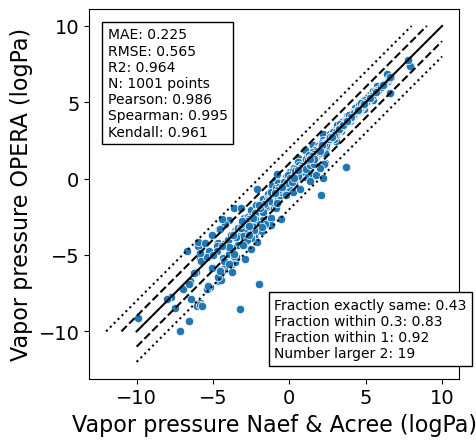

In [31]:
sns.scatterplot(x=vps_naef,y=vps_opera)
#plot the line of equality, as wel as the lines for 1 log unit difference, and 2 log unit difference
plt.plot([-10, 10], [-10, 10], color='black')
plt.xlabel('Vapor pressure Naef & Acree (logPa)', fontsize=16)
plt.ylabel('Vapor pressure OPERA (logPa)', fontsize=16)
plt.plot([-10, 10], [-11, 9], color='black', linestyle='dashed')
plt.plot([-11, 9], [-10, 10], color='black', linestyle='dashed')
plt.plot([-10, 10], [-12, 8], color='black', linestyle='dotted')
plt.plot([-12, 8], [-10, 10], color='black', linestyle='dotted')
#bigger x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#text boxes with metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
mae = mean_absolute_error(vps_naef,vps_opera)
rmse = np.sqrt(mean_squared_error(vps_naef,vps_opera))
r2 = r2_score(vps_naef,vps_opera)
pearson = pearsonr(vps_naef,vps_opera)
spearman = spearmanr(vps_naef,vps_opera)
kendall = kendalltau(vps_naef,vps_opera)
fraction_exactly_same = len([1 for i in range(len(vps_naef)) if abs(vps_naef[i]-vps_opera[i]) < 0.01])/len(vps_naef)
fraction_within_03 = len([1 for i in range(len(vps_naef)) if abs(vps_naef[i]-vps_opera[i]) < 0.3])/len(vps_naef)
fraction_within_1 = len([1 for i in range(len(vps_naef)) if abs(vps_naef[i]-vps_opera[i]) < 1])/len(vps_naef)
number_larger_2 = len([1 for i in range(len(vps_naef)) if abs(vps_naef[i]-vps_opera[i]) > 2])
text_box = plt.text(0.05, 0.95, 'MAE: {:.3f}\nRMSE: {:.3f}\nR2: {:.3f}\nN: {} points\nPearson: {:.3f}\nSpearman: {:.3f}\nKendall: {:.3f}'.format(mae, rmse, r2, len(vps_naef), pearson[0], spearman[0], kendall[0]), transform=plt.gca().transAxes, verticalalignment='top')
text_box.set_bbox(dict(facecolor='white', edgecolor='black'))
text_box = plt.text(0.50, 0.05, 'Fraction exactly same: {:.2f}\nFraction within 0.3: {:.2f}\nFraction within 1: {:.2f}\nNumber larger 2: {}'.format(fraction_exactly_same, fraction_within_03, fraction_within_1, number_larger_2), transform=plt.gca().transAxes, verticalalignment='bottom')
text_box.set_bbox(dict(facecolor='white', edgecolor='black'))
#make square
plt.gca().set_aspect('equal', 'box')
plt.savefig('vapor_pressure_comparison.png', dpi=800)

plt.show()


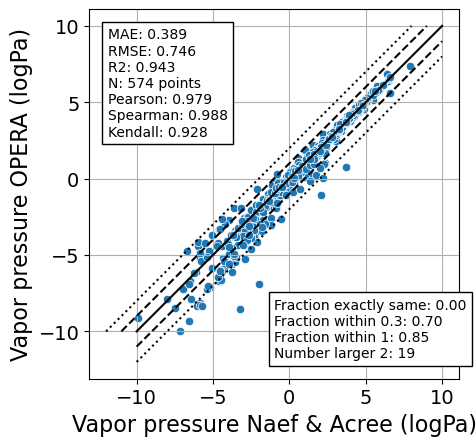

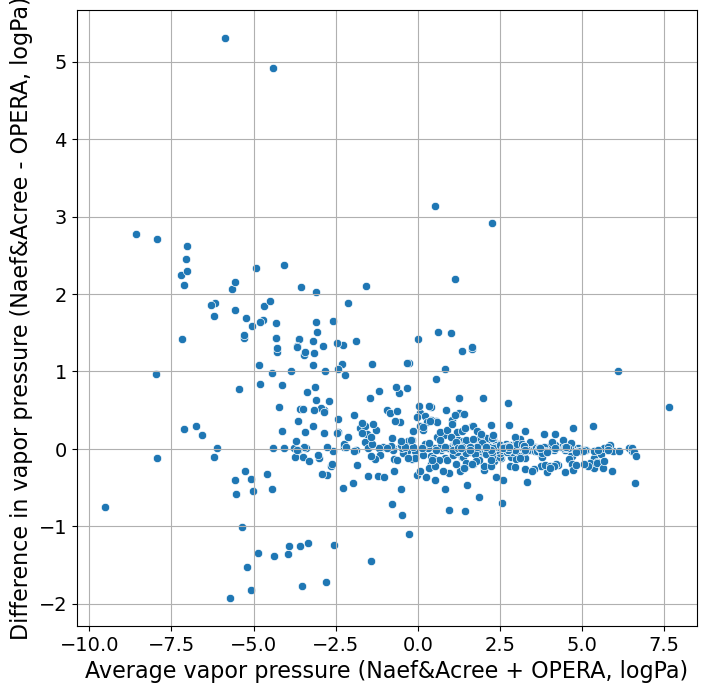

In [47]:
#now make a new list, removing all compounds that are the same (within 0.01 of eachoter)
vps_naef_no_exact_duplicates,vps_opera_no_exact_duplicates = [],[]
for i in range(len(vps_naef)):
    if abs(vps_naef[i]-vps_opera[i]) > 0.01:
        vps_naef_no_exact_duplicates.append(vps_naef[i])
        vps_opera_no_exact_duplicates.append(vps_opera[i])
sns.scatterplot(x=vps_naef_no_exact_duplicates,y=vps_opera_no_exact_duplicates)
#plot the line of equality, as wel as the lines for 1 log unit difference, and 2 log unit difference
plt.plot([-10, 10], [-10, 10], color='black')
plt.xlabel('Vapor pressure Naef & Acree (logPa)', fontsize=16)
plt.ylabel('Vapor pressure OPERA (logPa)', fontsize=16)
plt.plot([-10, 10], [-11, 9], color='black', linestyle='dashed')
plt.plot([-11, 9], [-10, 10], color='black', linestyle='dashed')
plt.plot([-10, 10], [-12, 8], color='black', linestyle='dotted')
plt.plot([-12, 8], [-10, 10], color='black', linestyle='dotted')
#bigger x and y ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#text boxes with metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
mae = mean_absolute_error(vps_naef_no_exact_duplicates,vps_opera_no_exact_duplicates)
rmse = np.sqrt(mean_squared_error(vps_naef_no_exact_duplicates,vps_opera_no_exact_duplicates))
r2 = r2_score(vps_naef_no_exact_duplicates,vps_opera_no_exact_duplicates)
pearson = pearsonr(vps_naef_no_exact_duplicates,vps_opera_no_exact_duplicates)
spearman = spearmanr(vps_naef_no_exact_duplicates,vps_opera_no_exact_duplicates)
kendall = kendalltau(vps_naef_no_exact_duplicates,vps_opera_no_exact_duplicates)
fraction_exactly_same = len([1 for i in range(len(vps_naef_no_exact_duplicates)) if abs(vps_naef_no_exact_duplicates[i]-vps_opera_no_exact_duplicates[i]) < 0.01])/len(vps_naef_no_exact_duplicates)
fraction_within_03 = len([1 for i in range(len(vps_naef_no_exact_duplicates)) if abs(vps_naef_no_exact_duplicates[i]-vps_opera_no_exact_duplicates[i]) < 0.3])/len(vps_naef_no_exact_duplicates)
fraction_within_1 = len([1 for i in range(len(vps_naef_no_exact_duplicates)) if abs(vps_naef_no_exact_duplicates[i]-vps_opera_no_exact_duplicates[i]) < 1])/len(vps_naef_no_exact_duplicates)
number_larger_2 = len([1 for i in range(len(vps_naef_no_exact_duplicates)) if abs(vps_naef_no_exact_duplicates[i]-vps_opera_no_exact_duplicates[i]) > 2])
text_box = plt.text(0.05, 0.95, 'MAE: {:.3f}\nRMSE: {:.3f}\nR2: {:.3f}\nN: {} points\nPearson: {:.3f}\nSpearman: {:.3f}\nKendall: {:.3f}'.format(mae, rmse, r2, len(vps_naef_no_exact_duplicates), pearson[0], spearman[0], kendall[0]), transform=plt.gca().transAxes, verticalalignment='top')
text_box.set_bbox(dict(facecolor='white', edgecolor='black'))
text_box = plt.text(0.50, 0.05, 'Fraction exactly same: {:.2f}\nFraction within 0.3: {:.2f}\nFraction within 1: {:.2f}\nNumber larger 2: {}'.format(fraction_exactly_same, fraction_within_03, fraction_within_1, number_larger_2), transform=plt.gca().transAxes, verticalalignment='bottom')
text_box.set_bbox(dict(facecolor='white', edgecolor='black'))
#make square
plt.gca().set_aspect('equal', 'box')
plt.grid()
plt.savefig('vapor_pressure_comparison_no_exact_duplicates.png', dpi=800)
plt.show()
average_vps_no_exact_dups = [(vps_naef_no_exact_duplicates[i]+vps_opera_no_exact_duplicates[i])/2 for i in range(len(vps_naef_no_exact_duplicates))]
difference_vps_no_exact_dups = [vps_naef_no_exact_duplicates[i]-vps_opera_no_exact_duplicates[i] for i in range(len(vps_naef_no_exact_duplicates))]

                                
# #and absolute differences; do 2 subplots
# fig,ax = plt.subplots(1,3,figsize=(16,8))
# sns.scatterplot(x=average_vps,y=difference_vps,ax=ax[0])
# ax[0].set_xlabel('Average vapor pressure (logPa)', fontsize=16)
# ax[0].set_ylabel('Difference in vapor pressure (logPa)', fontsize=16)

# sns.scatterplot(x=average_vps,y=[abs(difference) for difference in difference_vps],ax=ax[1])
# ax[1].set_xlabel('Average vapor pressure (logPa)', fontsize=16)
# ax[1].set_ylabel('Absolute difference in vapor pressure (logPa)', fontsize=16)
# #and as average error per bin of 1 log unit 
# bins = np.arange(-10,10,1)
# bin_means = []
# bin_stds = []
# for i in range(len(bins)-1):
#     bin_values = [difference_vps[j] for j in range(len(difference_vps)) if average_vps[j] >= bins[i] and average_vps[j] < bins[i+1]]
#     bin_means.append(np.mean(bin_values))
#     bin_stds.append(np.std(bin_values))
# ax[2].scatter(bins[:-1],bin_means)
# ax[2].set_xlabel('Average vapor pressure (logPa)', fontsize=16)
# ax[2].set_ylabel('Mean difference in vapor pressure (logPa)', fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.figure(figsize=(8,8))
sns.scatterplot(x=average_vps_no_exact_dups,y=difference_vps_no_exact_dups)
plt.xlabel('Average vapor pressure (Naef&Acree + OPERA, logPa)', fontsize=16)
plt.ylabel('Difference in vapor pressure (Naef&Acree - OPERA, logPa)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('vapor_pressure_comparison_average_no_exact_dups.png', dpi=800)
plt.show()


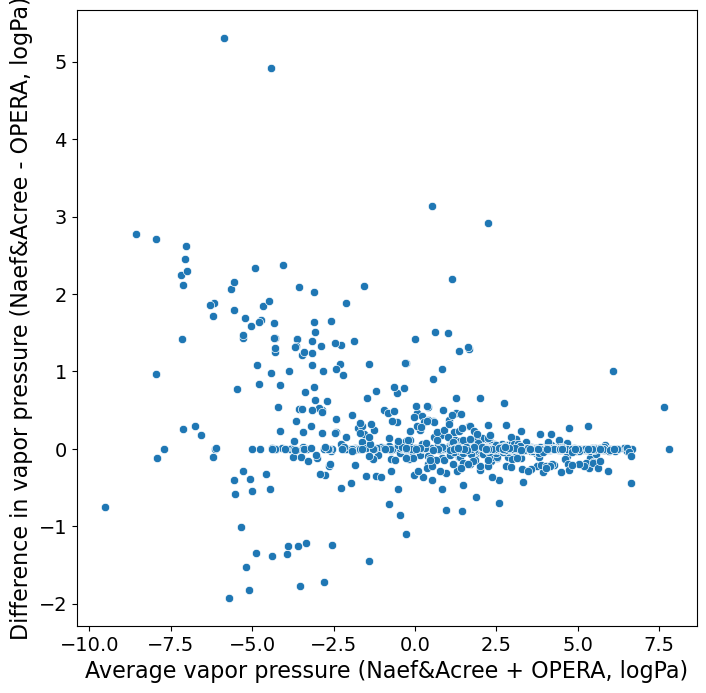

In [41]:
#also plot; on x axis the average vapor pressure, and on y axis the difference in vapor pressure
average_vps = [(vps_naef[i]+vps_opera[i])/2 for i in range(len(vps_naef))]
difference_vps = [vps_naef[i]-vps_opera[i] for i in range(len(vps_naef))]
# #and absolute differences; do 2 subplots
# fig,ax = plt.subplots(1,3,figsize=(16,8))
# sns.scatterplot(x=average_vps,y=difference_vps,ax=ax[0])
# ax[0].set_xlabel('Average vapor pressure (logPa)', fontsize=16)
# ax[0].set_ylabel('Difference in vapor pressure (logPa)', fontsize=16)

# sns.scatterplot(x=average_vps,y=[abs(difference) for difference in difference_vps],ax=ax[1])
# ax[1].set_xlabel('Average vapor pressure (logPa)', fontsize=16)
# ax[1].set_ylabel('Absolute difference in vapor pressure (logPa)', fontsize=16)
# #and as average error per bin of 1 log unit 
# bins = np.arange(-10,10,1)
# bin_means = []
# bin_stds = []
# for i in range(len(bins)-1):
#     bin_values = [difference_vps[j] for j in range(len(difference_vps)) if average_vps[j] >= bins[i] and average_vps[j] < bins[i+1]]
#     bin_means.append(np.mean(bin_values))
#     bin_stds.append(np.std(bin_values))
# ax[2].scatter(bins[:-1],bin_means)
# ax[2].set_xlabel('Average vapor pressure (logPa)', fontsize=16)
# ax[2].set_ylabel('Mean difference in vapor pressure (logPa)', fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.figure(figsize=(8,8))
sns.scatterplot(x=average_vps,y=difference_vps)
plt.xlabel('Average vapor pressure (Naef&Acree + OPERA, logPa)', fontsize=16)
plt.ylabel('Difference in vapor pressure (Naef&Acree - OPERA, logPa)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('vapor_pressure_comparison_average.png', dpi=800)



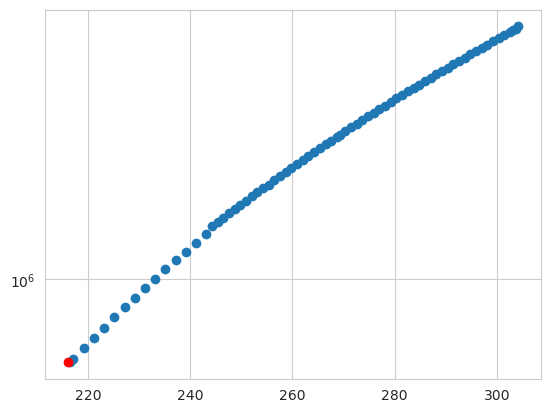

In [55]:
ts = [-56.6, -56.0, -54.0, -52.0, -50.0, -48.0, -46.0, -44.0, -42.0, -40.0, 
 -38.0, -36.0, -34.0, -32.0, -30.0, -28.89, -27.78, -26.67, -25.56, -24.44, 
 -23.33, -22.22, -21.11, -20.0, -18.89, -17.78, -16.67, -15.56, -14.44, 
 -13.33, -12.22, -11.11, -10.0, -8.89, -7.78, -6.67, -5.56, -4.44, 
 -3.89, -2.78, -1.67, -0.56, 0.56, 1.67, 2.78, 3.89, 5.0, 6.11, 7.22, 
 8.33, 9.44, 10.56, 11.67, 12.78, 13.89, 15.0, 16.11, 17.22, 18.33, 
 19.44, 20.56, 21.67, 22.78, 23.89, 25.0, 26.11, 27.22, 28.33, 29.44, 
 30.0, 30.56, 31.1]
vps = [518.3, 531.8, 579.1, 629.6, 683.4, 740.6, 801.3, 865.6, 933.8, 1005.7, 
 1081.9, 1161.8, 1246.2, 1335.1, 1428.6, 1521.0, 1575.0, 1630.0, 1686.0, 
 1744.0, 1804.0, 1866.0, 1928.0, 1993.0, 2059.0, 2114.0, 2197.0, 2269.0, 
 2343.0, 2418.0, 2495.0, 2574.0, 2654.0, 2738.0, 2823.0, 2910.0, 2999.0, 
 3090.0, 3136.0, 3230.0, 3327.0, 3425.0, 3526.0, 3629.0, 3735.0, 3843.0, 
 3953.0, 4067.0, 4182.0, 4300.0, 4420.0, 4544.0, 4670.0, 4798.0, 4929.0, 
 5063.0, 5200.0, 5340.0, 5482.0, 5628.0, 5776.0, 5928.0, 6083.0, 6240.0, 
 6401.0, 6565.0, 6733.0, 6902.0, 7081.0, 7164.0, 7253.0, 7391.0]
vps = [vp*1000 for vp in vps]
#tmp to kelvin, from celsius
ts = [t+273.15 for t in ts]
#plot
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(ts,vps)
#add big red dot ad t = 216 K and p = 518.5 kPa
plt.scatter(216,518500, color='red')


#now log scale on y axis
plt.yscale('log')


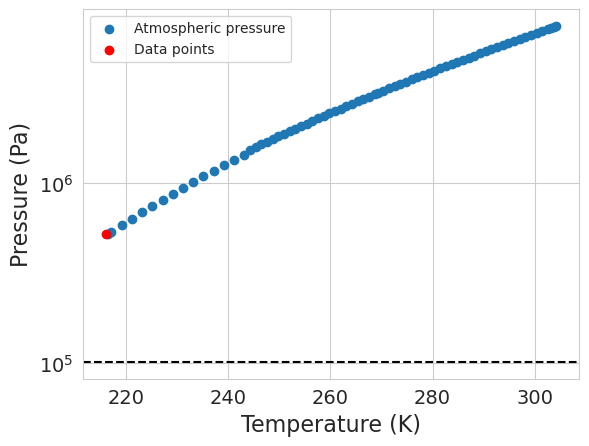

In [56]:

plt.scatter(ts,vps)
#add big red dot ad t = 216 K and p = 518.5 kPa
plt.scatter(216,518500, color='red')


#now log scale on y axis
plt.yscale('log')
#draw line at y = 101325
plt.axhline(y=101325, color='black', linestyle='--')
plt.xlabel('Temperature (K)', fontsize=16)
plt.ylabel('Pressure (Pa)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Atmospheric pressure','Data points'])

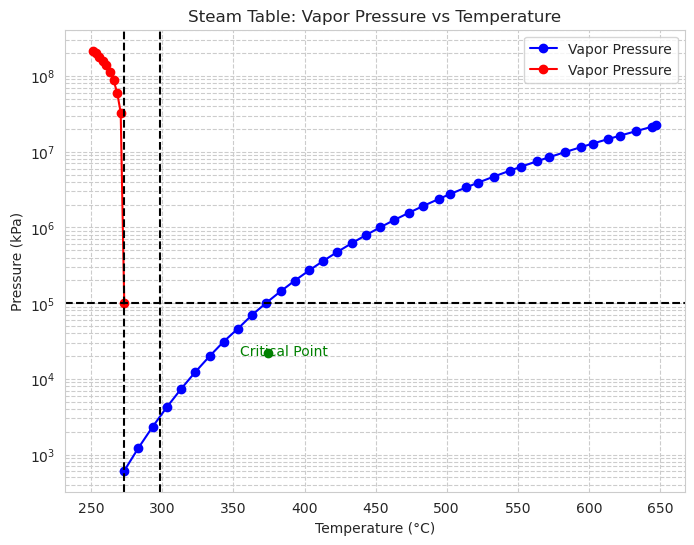

In [66]:
# Extracting the temperature and vapor pressure data from the provided table
temperature = [
    0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 
    170, 180, 190, 200, 210, 221.1, 229.4, 240.6, 248.9, 260.0, 271.1, 279.4, 
    290.6, 298.9, 310.0, 321.1, 329.4, 340.6, 348.9, 360.0, 371.1, 374.4
]
vapor_pressure = [
    0.612, 1.227, 2.336, 4.242, 7.370, 12.33, 19.90, 31.15, 46.12, 70.10, 
    101.32, 143.27, 198.50, 270.13, 361.4, 476.0, 618.1, 792.0, 1002.7, 
    1254.9, 1554.3, 1907.9, 2369.8, 2769.6, 3381.1, 3904.1, 4695.9, 5603.4, 
    6366.5, 7506.2, 8463.9, 9878.0, 11461, 12785, 14727, 16331, 18682, 21349, 22242
]
#kpa to pa
vapor_pressure = [vp*1000 for vp in vapor_pressure]
#temperature to kelvin
temperature = [t+273.15 for t in temperature]

# Creating the phase diagram plot
plt.figure(figsize=(8,6))
plt.plot(temperature, vapor_pressure, label="Vapor Pressure", marker='o', color='b')

# Mark the critical point
critical_temp = 374.4
critical_pressure = 22242
plt.scatter(critical_temp, critical_pressure, color='g', zorder=5)
plt.text(critical_temp - 20, critical_pressure - 2000, 'Critical Point', color='g')

# Labels and title
plt.yscale('log')  # Logarithmic scale for pressure
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (kPa)')
plt.title('Steam Table: Vapor Pressure vs Temperature')
plt.grid(True, which="both", ls="--")
temperature_new = [0.0, -2.5, -5.0, -7.5, -10.0, -12.5, -15.0, -17.5, -20.0, -22.1]
pressure_new = [101.325, 32950, 60311, 87279, 113267, 138274, 159358, 179952, 200251, 215746]
#kpa to pa
pressure_new = [p*1000 for p in pressure_new]
#temperature to kelvin

temperature_new = [t+273.15 for t in temperature_new]


# Creating the plot for the new data
plt.plot(temperature_new, pressure_new, label="Vapor Pressure", marker='o', color='r')
#line at atmospheric pressure
plt.axhline(y=101325, color='black', linestyle='--')
#and ambient temperature
plt.axvline(x=298.15, color='black', linestyle='--')
#and one at 0 degrees c
plt.axvline(x=273.15, color='black', linestyle='--')
# Labels an
plt.legend()

# Show the plot
plt.show()


In [68]:
#get a and b from clausius clapeyron
from scipy.stats import linregress
import numpy as np
temperature = [
    0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 
    170, 180, 190, 200, 210, 221.1, 229.4, 240.6, 248.9, 260.0, 271.1, 279.4, 
    290.6, 298.9, 310.0, 321.1, 329.4, 340.6, 348.9, 360.0, 371.1, 374.4
]
vapor_pressure = [
    0.612, 1.227, 2.336, 4.242, 7.370, 12.33, 19.90, 31.15, 46.12, 70.10, 
    101.32, 143.27, 198.50, 270.13, 361.4, 476.0, 618.1, 792.0, 1002.7, 
    1254.9, 1554.3, 1907.9, 2369.8, 2769.6, 3381.1, 3904.1, 4695.9, 5603.4, 
    6366.5, 7506.2, 8463.9, 9878.0, 11461, 12785, 14727, 16331, 18682, 21349, 22242
]
#kpa to pa
vapor_pressure = [vp*1000 for vp in vapor_pressure]
#temperature to kelvin
temperature = [t+273.15 for t in temperature]
# Step 1: Transform xs (temperature) to 1/T
inv_T = [1 / t for t in temperature]

# Step 2: Take the natural logarithm of ys (pressure)
ln_ys = np.log(vapor_pressure)

# Step 3: Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(inv_T, ln_ys)

#get vapour pressure at t = 298.15
A = intercept
B = -slope
T_K = 298.15
ln_P_pa = A - B/T_K
P_pa = np.exp(ln_P_pa)
P_pa


3412.343804369301

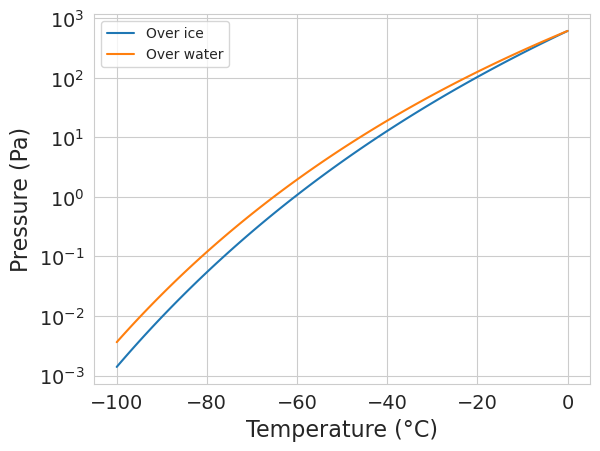

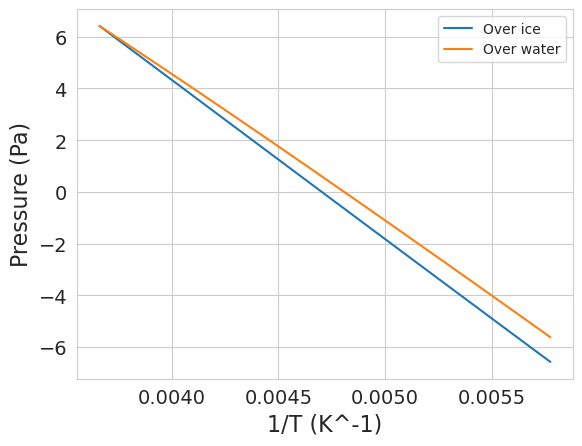

In [77]:
ts = [-100, -99, -98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
ps_in_pa_over_ice = [0.0013957, 0.0017094, 0.0020889, 0.002547, 0.0030987, 0.0037617, 0.0045569, 0.0055087, 0.0066455, 0.0080008, 0.0096132, 0.011528, 0.013797, 0.016482, 0.019653, 0.02339, 0.027788, 0.032954, 0.039011, 0.046102, 0.054388, 0.064057, 0.07532, 0.088419, 0.10363, 0.12127, 0.14168, 0.16528, 0.19252, 0.22391, 0.26004, 0.30156, 0.34921, 0.40383, 0.46633, 0.53778, 0.61933, 0.71231, 0.81817, 0.93854, 1.0753, 1.2303, 1.406, 1.6049, 1.8296, 2.0833, 2.3694, 2.6917, 3.0542, 3.4618, 3.9193, 4.4324, 5.0073, 5.6506, 6.3699, 7.1732, 8.0695, 9.0685, 10.181, 11.419, 12.794, 14.321, 16.016, 17.893, 19.973, 22.273, 24.816, 27.624, 30.723, 34.14, 37.903, 42.046, 46.601, 51.607, 57.104, 63.134, 69.745, 76.987, 84.914, 93.584, 103.06, 113.41, 124.7, 137.02, 150.44, 165.06, 180.97, 198.27,217.07, 237.49, 259.66, 283.69, 309.75, 337.97, 368.52, 401.58, 437.31, 475.92, 517.62, 562.62, 611.153]
ps_in_pa_over_water = [0.0036309, 0.0044121, 0.0053487, 0.0064692, 0.0078067, 0.0093996, 0.011293, 0.013538, 0.016195, 0.019333, 0.023031, 0.027381, 0.032489, 0.038474, 0.045473, 0.053645, 0.063166, 0.074241, 0.087101, 0.10201, 0.11925, 0.13918, 0.16215, 0.1886, 0.21901, 0.25391, 0.2939, 0.33966, 0.39193, 0.45156, 0.51948, 0.59672, 0.68446, 0.78397, 0.89668, 1.0242, 1.1682, 1.3306, 1.5136, 1.7195, 1.9509, 2.2106, 2.5018, 2.8277, 3.1922, 3.5993, 4.0535, 4.5597, 5.1231, 5.7496, 6.4454, 7.2174, 8.0729, 9.0201, 10.068, 11.225, 12.503, 13.911, 15.463, 17.17, 19.048, 21.11, 23.372, 25.853, 28.57, 31.544, 34.795, 38.347, 42.225, 46.453, 51.06, 56.077, 61.534, 67.466, 73.909, 80.902, 88.485, 96.701, 105.6, 115.22, 125.63, 136.88, 149.01, 162.11, 176.23, 191.44, 207.81, 225.43, 244.37, 264.72, 286.57, 310.02, 335.16, 362.1, 390.95, 421.84, 454.88, 490.19, 527.93, 568.22, 611.213]

#plot 2 lines; x= ts, ys = ps_in_pa_over_ice and ps_in_pa_over_water
plt.plot(ts, ps_in_pa_over_ice)
plt.plot(ts, ps_in_pa_over_water)
plt.yscale('log')
plt.xlabel('Temperature (°C)', fontsize=16)
plt.ylabel('Pressure (Pa)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Over ice','Over water'])
plt.show()

#and plot against 1/T
#we have a zero, get index, remove all
ts_in_k = [t+273.15 for t in ts]
inv_T = [1/t for t in ts_in_k]
ps_in_pa_over_ice_log = [np.log(p) for p in ps_in_pa_over_ice]
ps_in_pa_over_water_log = [np.log(p) for p in ps_in_pa_over_water]
plt.plot(inv_T, ps_in_pa_over_ice_log)
plt.plot(inv_T, ps_in_pa_over_water_log)
plt.xlabel('1/T (K^-1)', fontsize=16)
plt.ylabel('Pressure (Pa)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Over ice','Over water'])
plt.show()


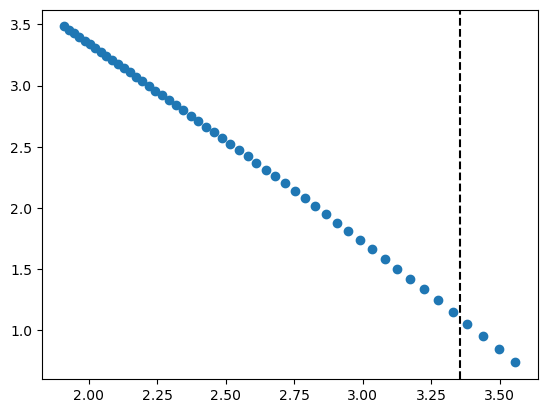

In [20]:
xs = [8,12.84, 17.68, 22.52, 27.36, 32.2, 37.04, 41.88, 46.72, 51.56, 56.4, 61.24, 66.08, 70.92, 75.76, 80.6, 85.44, 90.28, 95.12, 99.96, 104.8, 109.64, 114.48, 119.32, 124.16, 129, 133.84, 138.68, 143.52, 148.36, 153.2, 158.04, 162.88, 167.72, 172.56, 177.4, 182.24, 187.08, 191.92, 196.76, 201.6, 206.44, 211.28, 216.12, 220.96, 225.8, 230.64, 235.48, 240.32, 245.16, 250]
ys = [40.8824, 52.6555, 67.1212, 84.7331, 105.992, 131.447, 161.694, 197.38, 239.199, 287.892, 344.251, 409.11, 483.348, 567.889, 663.697, 781.062, 902.018, 1037.42, 1188.46, 1356.34, 1542.34, 1747.75, 1973.93, 2222.23, 2494.07, 2790.88, 3114.13, 3465.29, 3845.88, 4257.43, 4701.46, 5179.55, 5693.25, 6244.13, 6833.77, 7463.75, 8135.66, 8851.06, 9611.53, 10418.6, 11273.9, 12178.9, 13135.2, 14144.2, 15207.6, 16326.6, 17502.9, 18737.7, 20032.6, 21388.9, 22808]
# #x1 is xs where x < 80, y1 is ys where x < 80
#make df
import pandas as pd
df = pd.DataFrame({'T_celcius':xs,'vp_mmhg':ys})
df['vp_pa'] = df['vp_mmhg']*133.322
df['vp_Kpa'] = df['vp_pa']/1000
df['T_K'] = df['T_celcius']+273.15
df['log_vp_kpa'] = np.log10(df['vp_Kpa'])
df['T_1000/K'] = 1000/df['T_K']
#plot T_1000/K against log_vp_kpa
plt.scatter(df['T_1000/K'],df['log_vp_kpa'])
RT = 1000/298.15
#line at rt
plt.axvline(x=RT, color='black', linestyle='--')


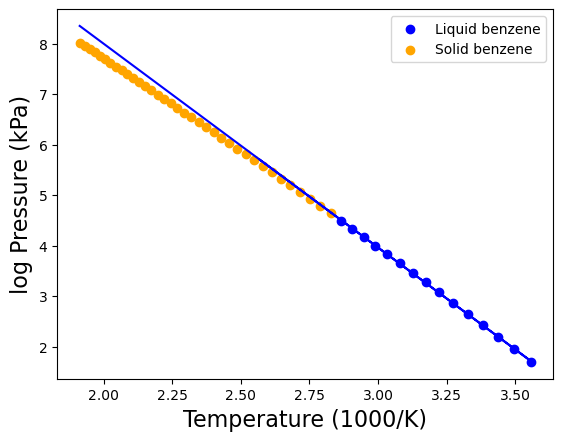

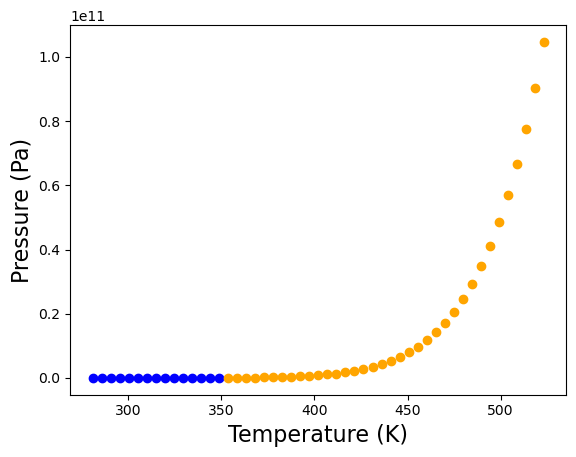

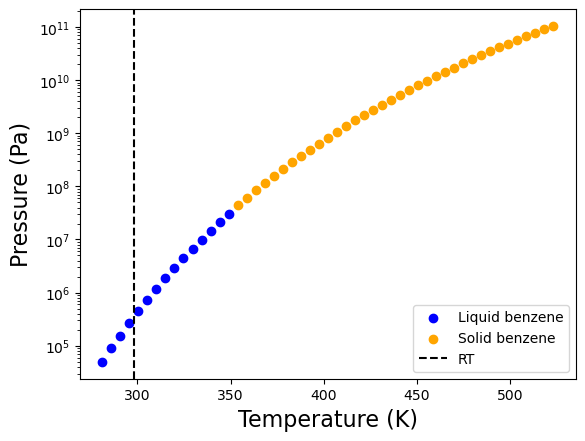

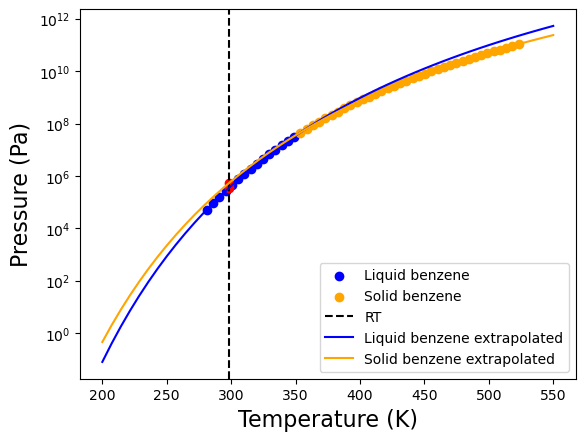

Difference between predicted VP at RT from liquid and solid benzene: -0.1858893620022286 log Pa


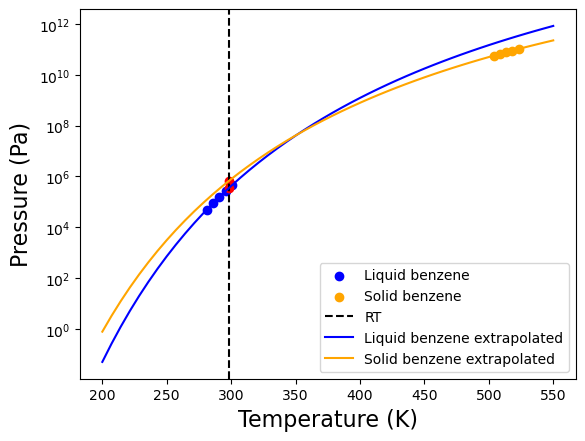

Difference between predicted VP at RT from liquid and solid benzene: -0.280259367682433 log Pa


In [16]:
# x1 = [1.796,1.875,1.937,1.988,2.115,2.222,2.288,2.355,2.406,2.503,2.559,2.62,2.686,2.773,2.808,2.885,2.961,3.007,3.048,3.13,3.171,3.252,3.278,3.359,3.385,3.466,3.492,3.556]
# y1 = [3.677,3.49,3.453,3.328,3.179,2.968,2.881,2.756,2.682,2.533,2.47,2.346,2.209,2.097,2.035,1.936,1.774,1.724,1.687,1.538,1.376,1.302,1.227,1.165,1.053,0.928,0.841,0.767]

# x2 = [3.627,3.696,3.747,3.803,3.864,3.91,3.935,4.012,4.032,4.078,4.144,4.19,4.211,4.272,4.338,4.389,4.435,4.466,4.537,4.547,4.603,4.634,4.659,4.991,5.121]
# y2 = [0.555,0.394,0.269,0.182,0.021,-0.104,-0.166,-0.278,-0.377,-0.564,-0.638,-0.763,-0.862,-0.949,-1.086,-1.21,-1.248,-1.459,-1.472,-1.708,-1.633,-1.782,-1.907,-2.777,-3.063]
#  8  	 40.8824  	 T < Tmin 
#  12.84  	 52.6555  	 T < Tmin 
#  17.68  	 67.1212  	 T < Tmin 
#  22.52  	 84.7331  	 T < Tmin 
#  27.36  	 105.992  	 T < Tmin 
#  32.2  	 131.447  	 T < Tmin 
#  37.04  	 161.694  	 T < Tmin 
#  41.88  	 197.38  	 T < Tmin 
#  46.72  	 239.199  	 T < Tmin 
#  51.56  	 287.892  	 T < Tmin 
#  56.4  	 344.251  	 T < Tmin 
#  61.24  	 409.11  	 T < Tmin 
#  66.08  	 483.348  	 T < Tmin 
#  70.92  	 567.889  	 T < Tmin 
#  75.76  	 663.697  	 T < Tmin 
#  80.6  	 T > Tmax  	 781.062 
#  85.44  	 T > Tmax  	 902.018 
#  90.28  	 T > Tmax  	 1037.42 
#  95.12  	 T > Tmax  	 1188.46 
#  99.96  	 T > Tmax  	 1356.34 
#  104.8  	 T > Tmax  	 1542.34 
#  109.64  	 T > Tmax  	 1747.75 
#  114.48  	 T > Tmax  	 1973.93 
#  119.32  	 T > Tmax  	 2222.23 
#  124.16  	 T > Tmax  	 2494.07 
#  129  	 T > Tmax  	 2790.88 
#  133.84  	 T > Tmax  	 3114.13 
#  138.68  	 T > Tmax  	 3465.29 
#  143.52  	 T > Tmax  	 3845.88 
#  148.36  	 T > Tmax  	 4257.43 
#  153.2  	 T > Tmax  	 4701.46 
#  158.04  	 T > Tmax  	 5179.55 
#  162.88  	 T > Tmax  	 5693.25 
#  167.72  	 T > Tmax  	 6244.13 
#  172.56  	 T > Tmax  	 6833.77 
#  177.4  	 T > Tmax  	 7463.75 
#  182.24  	 T > Tmax  	 8135.66 
#  187.08  	 T > Tmax  	 8851.06 
#  191.92  	 T > Tmax  	 9611.53 
#  196.76  	 T > Tmax  	 10418.6 
#  201.6  	 T > Tmax  	 11273.9 
#  206.44  	 T > Tmax  	 12178.9 
#  211.28  	 T > Tmax  	 13135.2 
#  216.12  	 T > Tmax  	 14144.2 
#  220.96  	 T > Tmax  	 15207.6 
#  225.8  	 T > Tmax  	 16326.6 
#  230.64  	 T > Tmax  	 17502.9 
#  235.48  	 T > Tmax  	 18737.7 
#  240.32  	 T > Tmax  	 20032.6 
#  245.16  	 T > Tmax  	 21388.9 
#  250  	 T > Tmax  	 22808 
xs = [8,12.84, 17.68, 22.52, 27.36, 32.2, 37.04, 41.88, 46.72, 51.56, 56.4, 61.24, 66.08, 70.92, 75.76, 80.6, 85.44, 90.28, 95.12, 99.96, 104.8, 109.64, 114.48, 119.32, 124.16, 129, 133.84, 138.68, 143.52, 148.36, 153.2, 158.04, 162.88, 167.72, 172.56, 177.4, 182.24, 187.08, 191.92, 196.76, 201.6, 206.44, 211.28, 216.12, 220.96, 225.8, 230.64, 235.48, 240.32, 245.16, 250]
ys = [40.8824, 52.6555, 67.1212, 84.7331, 105.992, 131.447, 161.694, 197.38, 239.199, 287.892, 344.251, 409.11, 483.348, 567.889, 663.697, 781.062, 902.018, 1037.42, 1188.46, 1356.34, 1542.34, 1747.75, 1973.93, 2222.23, 2494.07, 2790.88, 3114.13, 3465.29, 3845.88, 4257.43, 4701.46, 5179.55, 5693.25, 6244.13, 6833.77, 7463.75, 8135.66, 8851.06, 9611.53, 10418.6, 11273.9, 12178.9, 13135.2, 14144.2, 15207.6, 16326.6, 17502.9, 18737.7, 20032.6, 21388.9, 22808]
# #x1 is xs where x < 80, y1 is ys where x < 80
# x1 = [x for x in xs if x < 80]
# y1 = [ys[i] for i in range(len(xs)) if xs[i] < 80]
# x2 = [x for x in xs if x > 80]
# y2 = [ys[i] for i in range(len(xs)) if xs[i] > 80]
# #convert x from degrees celsius to kelvin
# x1 = [x+273.15 for x in x1]
# #and then to 1000/K
# x1 = [1000/x for x in x1]
# x2 = [x+273.15 for x in x2]
# x2 = [1000/x for x in x2]
# #and y from mmHg to kPa
# y1 = [y*0.133322 for y in y1]
# y2 = [y*0.133322 for y in y2]
# #and to log
# y1 = [np.log(y) for y in y1]
# y2 = [np.log(y) for y in y2]

#plot both
import matplotlib.pyplot as plt
plt.scatter(x1,y1,color='blue')
plt.scatter(x2,y2,color='orange')
plt.xlabel('Temperature (1000/K)', fontsize=16)
plt.ylabel('log Pressure (kPa)', fontsize=16)
#also fit lin gres to x1 and y1, and show fitted line for whole range of x1 and x2
from scipy.stats import linregress
import numpy as np
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
x1_pts = [min(x1+ x2), max(x1+x2),np.mean(x1+x2)]
y1_pts = [slope*x + intercept for x in x1_pts]
plt.plot(x1_pts,y1_pts, color='blue')
plt.legend(['Liquid benzene','Solid benzene'])
plt.savefig('benzene_phase_diagram_reproduce_dbd.png', dpi=800)
plt.show()
#now go from pressur in log kpa to pa
y1_kpa = [10**y for y in y1]
y2_kpa = [10**y for y in y2]
y1_pa = [y*1000 for y in y1_kpa]
y2_pa = [y*1000 for y in y2_kpa]
#and t from 1000/K to K
x1_K = [1000/x for x in x1]
x2_K = [1000/x for x in x2]
plt.scatter(x1_K,y1_pa,color='blue')
plt.scatter(x2_K,y2_pa,color='orange')
plt.xlabel('Temperature (K)', fontsize=16)
plt.ylabel('Pressure (Pa)', fontsize=16)
plt.show()
#
plt.scatter(x1_K,y1_pa,color='blue')
plt.scatter(x2_K,y2_pa,color='orange')
plt.xlabel('Temperature (K)', fontsize=16)
plt.ylabel('Pressure (Pa)', fontsize=16)
plt.yscale('log')
#line at 298.15 K
plt.axvline(x=298.15, color='black', linestyle='--')
plt.legend(['Liquid benzene','Solid benzene','RT'])
plt.savefig('benzene_phase_diagram_logp_T.png', dpi=800)
plt.show()
#now do the clausius clapeyron
from scipy.stats import linregress
import numpy as np
inv_T1 = [1/t for t in x1_K]
ln_P1 = [np.log(p) for p in y1_pa]
slope, intercept, r_value, p_value, std_err = linregress(inv_T1, ln_P1)
A1 = intercept
B1 = -slope
inv_T2 = [1/t for t in x2_K]
ln_P2 = [np.log(p) for p in y2_pa]
slope, intercept, r_value, p_value, std_err = linregress(inv_T2, ln_P2)
A2 = intercept
B2 = -slope
A1,B1,A2,B2
#and use these to get the vapor pressure at 298.15 K
T_K = 298.15
P1 = np.exp(A1 - B1/T_K)
P2 = np.exp(A2 - B2/T_K)

P1,P2
#now a plot with the scattered datapoint, and the fitted lines. and big dots at extrapolated points
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x1_K,y1_pa,color='blue')
plt.scatter(x2_K,y2_pa,color='orange')
plt.xlabel('Temperature (K)', fontsize=16)
plt.ylabel('Pressure (Pa)', fontsize=16)
plt.yscale('log')
#line at 298.15 K
plt.axvline(x=298.15, color='black', linestyle='--')
#plot the fitted lines
T_K_pts = np.linspace(200,550,50)
P1_pts = [np.exp(A1 - B1/T) for T in T_K_pts]
P2_pts = [np.exp(A2 - B2/T) for T in T_K_pts]
plt.plot(T_K_pts,P1_pts, color='blue')
plt.plot(T_K_pts,P2_pts, color='orange')
#big dots at extrapolated points
plt.scatter(298.15,P1, color='red')
plt.scatter(298.15,P2, color='red')
#add legend; x1 is liquid benzenze, x2 is solid benezene
plt.legend(['Liquid benzene','Solid benzene','RT','Liquid benzene extrapolated','Solid benzene extrapolated'])
plt.savefig('benzene_phase_diagram_logp_T_with_fitted_lines_full_range.png', dpi=800)
plt.show()
#print out diff between p1 and p2
print(f'Difference between predicted VP at RT from liquid and solid benzene: {np.log10(P1)-np.log10(P2)} log Pa')
#now repeat the same thing, but make the fit only on the lowest 5 points for x1, and highest 5 points for x2
x1_low = x1_K[:5]
y1_low = y1_pa[:5]
x2_high = x2_K[-5:]
y2_high = y2_pa[-5:]
#do the fit
inv_T1_low = [1/t for t in x1_low]
ln_P1_low = [np.log(p) for p in y1_low]
slope, intercept, r_value, p_value, std_err = linregress(inv_T1_low, ln_P1_low)
A1_low = intercept
B1_low = -slope
inv_T2_high = [1/t for t in x2_high]
ln_P2_high = [np.log(p) for p in y2_high]
slope, intercept, r_value, p_value, std_err = linregress(inv_T2_high, ln_P2_high)
A2_high = intercept
B2_high = -slope
#and use these to get the vapor pressure at 298.15 K
T_K = 298.15
P1_low = np.exp(A1_low - B1_low/T_K)
P2_high = np.exp(A2_high - B2_high/T_K)
#now plot the data points, the fitted lines, and the extrapolated points

plt.scatter(x1_low,y1_low,color='blue')
plt.scatter(x2_high,y2_high,color='orange')
plt.xlabel('Temperature (K)', fontsize=16)
plt.ylabel('Pressure (Pa)', fontsize=16)
plt.yscale('log')
#line at 298.15 K
plt.axvline(x=298.15, color='black', linestyle='--')
#plot the fitted lines
T_K_pts = np.linspace(200,550,50)
P1_pts = [np.exp(A1_low - B1_low/T) for T in T_K_pts]
P2_pts = [np.exp(A2_high - B2_high/T) for T in T_K_pts]
plt.plot(T_K_pts,P1_pts, color='blue')
plt.plot(T_K_pts,P2_pts, color='orange')
#big dots at extrapolated points
plt.scatter(298.15,P1_low, color='red')
plt.scatter(298.15,P2_high, color='red')
#add legend; x1 is liquid benzenze, x2 is solid benezene
plt.legend(['Liquid benzene','Solid benzene','RT','Liquid benzene extrapolated','Solid benzene extrapolated'])
plt.savefig('benzene_phase_diagram_logp_T_with_fitted_lines_fit_extremes.png', dpi=800)

plt.show()
print(f'Difference between predicted VP at RT from liquid and solid benzene: {np.log10(P1_low)-np.log10(P2_high)} log Pa')



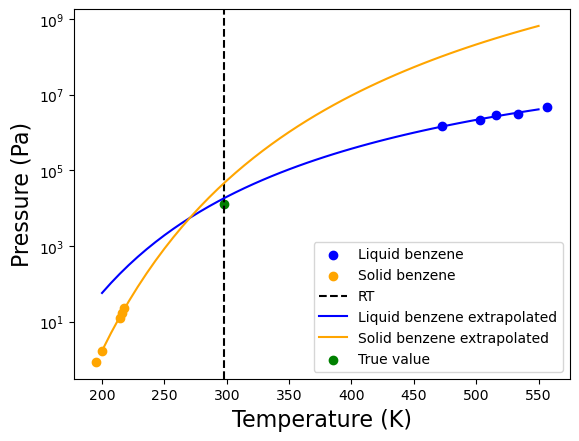

Difference between predicted VP at RT from liquid and solid benzene: -0.4037958811717006 log Pa


In [13]:
plt.scatter(x1_low,y1_low,color='blue')
plt.scatter(x2_high,y2_high,color='orange')
plt.xlabel('Temperature (K)', fontsize=16)
plt.ylabel('Pressure (Pa)', fontsize=16)
plt.yscale('log')
#line at 298.15 K
plt.axvline(x=298.15, color='black', linestyle='--')
#plot the fitted lines
T_K_pts = np.linspace(200,550,50)
P1_pts = [np.exp(A1_low - B1_low/T) for T in T_K_pts]
P2_pts = [np.exp(A2_high - B2_high/T) for T in T_K_pts]
plt.plot(T_K_pts,P1_pts, color='blue')
plt.plot(T_K_pts,P2_pts, color='orange')
#big dots at extrapolated points
# plt.scatter(298.15,P1_low, color='red')
# plt.scatter(298.15,P2_high, color='red')
#add legend; x1 is liquid benzenze, x2 is solid benezene
X_true = 298
y_true = 12681
plt.scatter(X_true,y_true, color='green')
plt.legend(['Liquid benzene','Solid benzene','RT','Liquid benzene extrapolated','Solid benzene extrapolated','True value'])
#also plot
#save
plt.savefig('benzene_phase_diagram_logp_T_with_fitted_lines_fit_extremes_and_true.png', dpi=800)
plt.show()
print(f'Difference between predicted VP at RT from liquid and solid benzene: {np.log10(P1_low)-np.log10(P2_high)} log Pa')


In [5]:
P1_low, P2_high
p1_low_logpa = np.log10(P1_low)
p2_high_logpa = np.log10(P2_high)
p_benz_298_true = 12681
p_benz_298_true_logpa = np.log10(p_benz_298_true)
diff_p1_low = p_benz_298_true_logpa - p1_low_logpa
diff_p2_high = p_benz_298_true_logpa - p2_high_logpa
diff_p1_low, diff_p2_high

(-0.16804745704154378, -0.5718433382132444)

In [6]:
P1,P2

(13458.420687706745, 17488.03392678678)

In [7]:
P1_low, P2_high

(18672.43514124167, 47314.78170756228)

In [3]:
import psycopg2
import pandas as pd
conn = psycopg2.connect("dbname=cs_mdfps user=cschiebroek host=lebanon")
query = """
SELECT 
    e.molregno,
    c.conf_id,
    e.vp_log10_pa,
    m.mdfp,
    c.molblock,
    m.md_experiment_uuid,
    cd.confgen_uuid
FROM 
    cs_mdfps_schema.experimental_data e
JOIN 
    conformers c ON e.molregno = c.molregno
LEFT JOIN 
    cs_mdfps_schema.mdfp_experiment_data m ON c.conf_id = m.conf_id
LEFT JOIN 
    cs_mdfps_schema.confid_data cd ON c.conf_id = cd.conf_id;
"""
df = pd.read_sql(query, conn)
md_experiment_uuids_to_remove = ['80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a',
                                '24e3946b-fb2c-47bf-9965-1682bb0d63c9',
                                '5166be97-ef21-4cc5-bee1-719c7b9e3397',
                                '13d08336-fb79-4042-83ce-af906193ff20']





df = df[~df['md_experiment_uuid'].isin(md_experiment_uuids_to_remove)]
df = df[df['confgen_uuid'] != '11093a30-b6d0-4e3f-a22b-8dcad60d6a11']
df = df.dropna(subset=['mdfp'])
df

,molregno,conf_id,vp_log10_pa,mdfp,molblock,md_experiment_uuid,confgen_uuid
0,8,1151,-3.053298,"{'mdfp': '[13, 1, 0, 2, 0, 0, 0, 0, 0, 0, -97....",[H]OC(=O)c1c([H])c([H])c2c([H])c([H])c([H])c([...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
1,2390,2388,2.325202,"{'mdfp': '[10, 1, 0, 0, 0, 0, 0, 0, 0, 0, -24....",[H]C([H])=C1C([H])=C([H])[C@]([H])(C([H])(C([H...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
2,2417,2415,-1.698998,"{'mdfp': '[15, 4, 1, 1, 0, 0, 1, 2, 0, 0, -174...",[H]/C(Cl)=C(/Cl)C([H])([H])SC(=O)N(C([H])(C([H...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
3,13,1156,3.664201,"{'mdfp': '[6, 2, 0, 0, 0, 0, 0, 0, 1, 0, -1.41...",[H]C([H])([H])C([H])(C([H])([H])[H])C([H])([H]...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
4,14,1157,0.000000,"{'mdfp': '[10, 0, 0, 1, 0, 0, 0, 3, 0, 0, -34....",[H]Oc1c([H])c([H])c(Cl)c(Cl)c1Cl\n RDKit ...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
...,...,...,...,...,...,...,...
12771,2680,17260,2.216000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.1...",[H]O[C@]1([H])C([H])([H])C([H])([H])C([H])([H]...,26dee5cf-c401-4924-9c43-6e5f8f311763,2153b1f8-cb83-4974-86a3-249f49ab55b7
12772,16755,16753,4.171803,"{'mdfp': '[5, 2, 0, 1, 0, 0, 0, 0, 0, 0, -13.1...",[H]C(=O)C([H])([H])C([H])([H])C([H])([H])[H]\n...,26dee5cf-c401-4924-9c43-6e5f8f311763,2153b1f8-cb83-4974-86a3-249f49ab55b7
12773,16848,16846,-6.895098,"{'mdfp': '[22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7.07...",[H]c1c([H])c([H])c2c(c1[H])c([H])c([H])c1c([H]...,26dee5cf-c401-4924-9c43-6e5f8f311763,2153b1f8-cb83-4974-86a3-249f49ab55b7
12774,464,17265,1.937802,"{'mdfp': '[11, 0, 0, 1, 0, 0, 0, 0, 0, 0, -16....",[H]C([H])([H])C1(C([H])([H])[H])[C@@]2([H])C([...,26dee5cf-c401-4924-9c43-6e5f8f311763,2153b1f8-cb83-4974-86a3-249f49ab55b7


In [4]:
df_test = pd.read_csv('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/data_curation/OPERA_Naef_Stratified_Test.csv')
df = df[~df['molregno'].isin(df_test['molregno'])]
df

,molregno,conf_id,vp_log10_pa,mdfp,molblock,md_experiment_uuid,confgen_uuid
0,8,1151,-3.053298,"{'mdfp': '[13, 1, 0, 2, 0, 0, 0, 0, 0, 0, -97....",[H]OC(=O)c1c([H])c([H])c2c([H])c([H])c([H])c([...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
1,2390,2388,2.325202,"{'mdfp': '[10, 1, 0, 0, 0, 0, 0, 0, 0, 0, -24....",[H]C([H])=C1C([H])=C([H])[C@]([H])(C([H])(C([H...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
2,2417,2415,-1.698998,"{'mdfp': '[15, 4, 1, 1, 0, 0, 1, 2, 0, 0, -174...",[H]/C(Cl)=C(/Cl)C([H])([H])SC(=O)N(C([H])(C([H...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
3,13,1156,3.664201,"{'mdfp': '[6, 2, 0, 0, 0, 0, 0, 0, 1, 0, -1.41...",[H]C([H])([H])C([H])(C([H])([H])[H])C([H])([H]...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
4,14,1157,0.000000,"{'mdfp': '[10, 0, 0, 1, 0, 0, 0, 3, 0, 0, -34....",[H]Oc1c([H])c([H])c(Cl)c(Cl)c1Cl\n RDKit ...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
...,...,...,...,...,...,...,...
12771,2680,17260,2.216000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.1...",[H]O[C@]1([H])C([H])([H])C([H])([H])C([H])([H]...,26dee5cf-c401-4924-9c43-6e5f8f311763,2153b1f8-cb83-4974-86a3-249f49ab55b7
12772,16755,16753,4.171803,"{'mdfp': '[5, 2, 0, 1, 0, 0, 0, 0, 0, 0, -13.1...",[H]C(=O)C([H])([H])C([H])([H])C([H])([H])[H]\n...,26dee5cf-c401-4924-9c43-6e5f8f311763,2153b1f8-cb83-4974-86a3-249f49ab55b7
12773,16848,16846,-6.895098,"{'mdfp': '[22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7.07...",[H]c1c([H])c([H])c2c(c1[H])c([H])c([H])c1c([H]...,26dee5cf-c401-4924-9c43-6e5f8f311763,2153b1f8-cb83-4974-86a3-249f49ab55b7
12774,464,17265,1.937802,"{'mdfp': '[11, 0, 0, 1, 0, 0, 0, 0, 0, 0, -16....",[H]C([H])([H])C1(C([H])([H])[H])[C@@]2([H])C([...,26dee5cf-c401-4924-9c43-6e5f8f311763,2153b1f8-cb83-4974-86a3-249f49ab55b7


In [5]:
#add ../benchmarking_platform to path
import sys
sys.path.append('../benchmarking_platform')
sys.path.append('../..')
from utils.data_preprocessing import calculate_RDKit_PhysChem_descriptors
df = calculate_RDKit_PhysChem_descriptors(df, conn)

2024-09-10 14:22:39,000 - INFO - Fetching RDKit descriptors from the database...
2024-09-10 14:22:39,938 - INFO - Merging RDKit descriptors with the main dataframe...


Text(0.05, 0.95, '$RMSE=2.04$\n$MAE=1.39$\n$Frac_{error<1}=0.52$\n$Kendall=0.65$\n$Pearson=0.81$\n$R^2=0.66$')

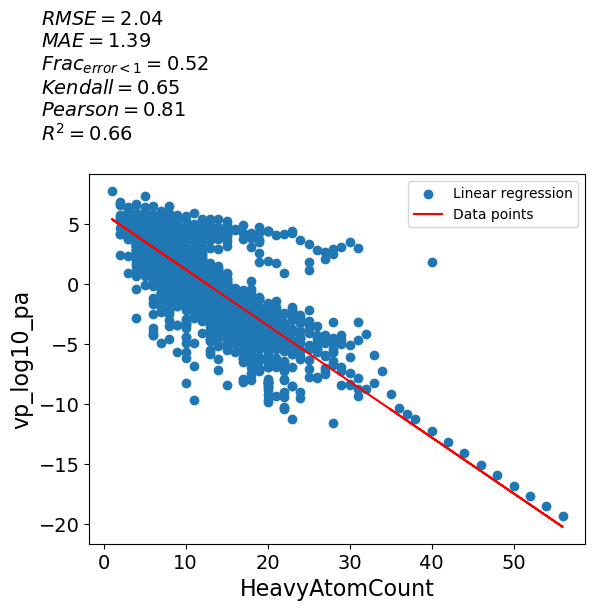

In [11]:
#fit linear regression between HeavyAtomCount and vp_log10_pa
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['HeavyAtomCount'],df['vp_log10_pa'])
#and plot
import matplotlib.pyplot as plt
plt.scatter(df['HeavyAtomCount'],df['vp_log10_pa'])
plt.plot(df['HeavyAtomCount'],slope*df['HeavyAtomCount']+intercept, color='red')
plt.xlabel('HeavyAtomCount', fontsize=16)
plt.ylabel('vp_log10_pa', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Linear regression','Data points'])
#get metrics: rmse, mae, frac of error < 1, kendall, r2, pearson
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import kendalltau, pearsonr
import numpy as np
y_pred = slope*df['HeavyAtomCount']+intercept
rmse = np.sqrt(mean_squared_error(df['vp_log10_pa'],y_pred))
mae = mean_absolute_error(df['vp_log10_pa'],y_pred)
frac_error_lt_1 = len([1 for i in range(len(df['vp_log10_pa'])) if abs(df['vp_log10_pa'].iloc[i]-y_pred.iloc[i]) < 1])/len(df['vp_log10_pa'])
kendall, _ = kendalltau(df['vp_log10_pa'],y_pred)
pearson, _ = pearsonr(df['vp_log10_pa'],y_pred)
r2 = r2_score(df['vp_log10_pa'],y_pred)
#put in textbox
textstr = '\n'.join((
    r'$RMSE=%.2f$' % (rmse, ),
    r'$MAE=%.2f$' % (mae, ),
    r'$Frac_{error<1}=%.2f$' % (frac_error_lt_1, ),
    r'$Kendall=%.2f$' % (kendall, ),
    r'$Pearson=%.2f$' % (pearson, ),
    r'$R^2=%.2f$' % (r2, )))
plt.text(0.05, 0.95, textstr, fontsize=14, transform=plt.gcf().transFigure)
#add density


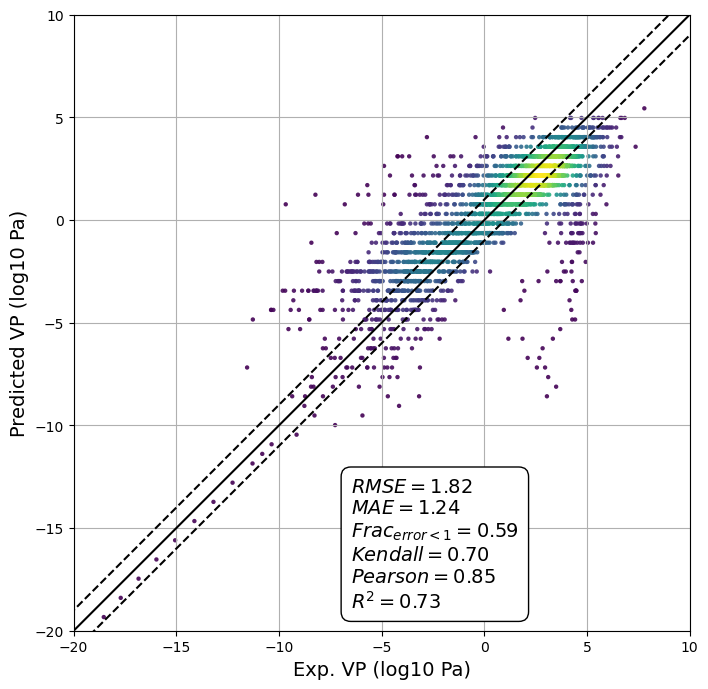

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
import statsmodels.api as sm

real = df['vp_log10_pa']
prediction = slope*df['HeavyAtomCount']+intercept

# Plotting
ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real), max(prediction + real)], 'k-')
ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) - 1, max(prediction + real) - 1], 'k--')
ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) + 1, max(prediction + real) + 1], 'k--')

dens_u = sm.nonparametric.KDEMultivariate(data=[real, prediction], var_type='cc', bw='normal_reference')
z = dens_u.pdf([real, prediction])

sc = ax.scatter(real, prediction, lw=0, c=z, s=10, alpha=0.9)

ax.set_xlabel(r'Exp. VP (log10 Pa)', fontsize=14)
ax.set_ylabel(r'Predicted VP (log10 Pa)', fontsize=14)
ax.grid(True, which="both")

lower = -20
upper = 10


ax.axis([lower, upper, lower, upper])


ax.set_aspect('equal', 'box')
#add textbox with RMSE, MAE, frac error < 1, kendall
textstr = '\n'.join((
    r'$RMSE=%.2f$' % (rmse, ),
    r'$MAE=%.2f$' % (mae, ),
    r'$Frac_{error<1}=%.2f$' % (frac_error_lt_1, ),
    r'$Kendall=%.2f$' % (kendall, ),
    r'$Pearson=%.2f$' % (pearson, ),
    r'$R^2=%.2f$' % (r2, )))
ax.text(0.45, 0.25, textstr,
                    transform=ax.transAxes, fontsize=14, verticalalignment='top',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.savefig('HeavyAtomCount_vs_vp_log10_pa.png', dpi=800)
plt.show()


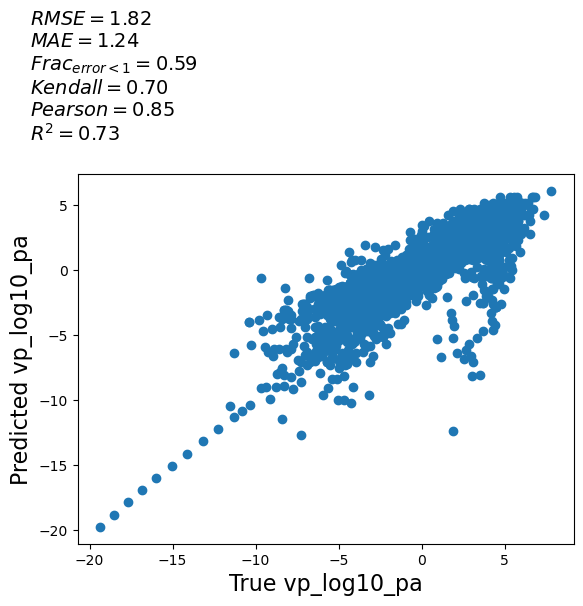

In [13]:
#also do one with NumHBondAcceptors and NumHBondDonors as well. use sklearn LinearRegression for this
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df[['NumHAcceptors','NumHDonors','HeavyAtomCount']],df['vp_log10_pa'])
y_pred = lr.predict(df[['NumHAcceptors','NumHDonors','HeavyAtomCount']])
rmse = np.sqrt(mean_squared_error(df['vp_log10_pa'],y_pred))
mae = mean_absolute_error(df['vp_log10_pa'],y_pred)
frac_error_lt_1 = len([1 for i in range(len(df['vp_log10_pa'])) if abs(df['vp_log10_pa'].iloc[i]-y_pred[i]) < 1])/len(df['vp_log10_pa'])
kendall, _ = kendalltau(df['vp_log10_pa'],y_pred)
pearson, _ = pearsonr(df['vp_log10_pa'],y_pred)
r2 = r2_score(df['vp_log10_pa'],y_pred)
#put in textbox
textstr = '\n'.join((
    r'$RMSE=%.2f$' % (rmse, ),
    r'$MAE=%.2f$' % (mae, ),
    r'$Frac_{error<1}=%.2f$' % (frac_error_lt_1, ),
    r'$Kendall=%.2f$' % (kendall, ),
    r'$Pearson=%.2f$' % (pearson, ),
    r'$R^2=%.2f$' % (r2, )))
plt.text(0.05, 0.95, textstr, fontsize=14, transform=plt.gcf().transFigure)
#plt pred vs true
plt.scatter(df['vp_log10_pa'],y_pred)
plt.xlabel('True vp_log10_pa', fontsize=16)
plt.ylabel('Predicted vp_log10_pa', fontsize=16)

plt.show()